# Open CV & Image Analysis

Lets pursue understanding a image and video processesing library which will help preprocess data to feed into DNNS 
& accomplish CV tasks such as object detection, image classification among others!

This will also allow us to better understand the input features that we feed into CNNS. 
<br> 
#### Note, this notebook covers many different concepts of manipulating an image, object detection etc, but it is important you read through the documentation to understand what is going on!
Resource:https://pythonprogramming.net/loading-images-python-opencv-tutorial/ <br>
CV2 Documentation: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html

<h3> Lets go ahead and download and import opencv along with the other packages we will be using </h3>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

<h3> Importing & Showing Images </h3>

Note how the grayscale is one dimensional and the colored images are 3 as they should be RGB

In [3]:
# Import
gray_img = cv2.imread('C:/Users/Darshil/Desktop/Dreams/watch.jpg',cv2.IMREAD_GRAYSCALE)
c_img = cv2.imread('C:/Users/Darshil/Desktop/Dreams/watch.jpg',cv2.IMREAD_COLOR)

# You can show an image in different ways, example: matplotlib and via cv

# Via cv2
cv2.imshow('image', c_img)     # try shpwing gray_img as well  
cv2.waitKey(0)                 #just waits for any key to be pressed
cv2.destroyAllWindows()

cv2.imwrite('C:/Users/Darshil/Desktop/Dreams/save_watch.jpg', c_img)   #how to save an image 

True

In [2]:
#via matplotlib
plt.imshow(c_img,cmap = 'gray', interpolation = 'bicubic')
plt.plot([50,100], [80,100], 'c', linewidth=5)     #plotting directly on the image!
plt.show()

NameError: name 'c_img' is not defined

# Loading Video Sources

Note that a video is simply image frames loaded in a certain second (FPS) - hence just a bunch of images really!

In [35]:
cap = cv2.VideoCapture(0)        #The 0 means it will use the first webcam. If you have one just use 0 obv
fourcc = cv2.VideoWriter_fourcc(*'XVID')       #Here we decide what type of video we're reading I think?
out = cv2.VideoWriter('output.avi', fourcc, 20.0,(640,480))    # Where to output and in what format


while True:
    ret, frame = cap.read()      # we read each frame of the video 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)     #
    out.write(frame)                                   # we write the file here
    cv2.imshow('gray', gray)
    
    if cv2.waitKey(0) == ord('q'):              #Remember that waitkey waits for you to press something and then exit
        break
        
        
cv2.destroyAllWindows()
cap.release()          # you release so that the camera is done using 
#out.release()


# Drawing & Writing on Images

In [8]:
c_img = cv2.imread('C:/Users/Darshil/Desktop/Dreams/watch.jpg',cv2.IMREAD_COLOR)

"""
NOTE:
Remember that we refer to points in an image based on the dimensions and the coordinates which always start from (0,0) top left
and go down. then (0,0) bottom left and goes sideways. For RGB there are 3 channels
"""

# Lets draw some cool stuff on our image!
cv2.line(c_img, (0,50), (150,150), (255,255,255), 1)    #Here in the last parenthesis, we specific RGB values for the line
cv2.rectangle(c_img, (0,0), (150,160), (0,255,0), 5)    # We specifc the starting and ending points for the hypotenuse and then it figures it out   
cv2.circle(c_img, (150,50),55,(0,0,255),1)                   # image, center, radius,color,filled in color or not -1
pts = np.array([[0,0],[0,160],[150,160],[150,10]], np.int32) # Here we create a numpy array row for each point and number of points defines the polygon
cv2.polylines(c_img,[pts],True,(0,255,255),3)          #image, points,true connects the dots,color,size

# Lets write on our image!
font = cv2.FONT_HERSHEY_SIMPLEX   #determine font
cv2.putText(c_img,'Writing stuff!', (0,130),font,1,(200,255,255),1,cv2.LINE_AA)  #IMAGE,text,position start,font,size,color,thickness,-


# Show
cv2.imshow('draw', c_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Operations
Lets go over some basics of image operations. Interestingly enoough what a lot of people do is convert a color image into grayscale, perform the analysis and often relay the tangible outcome of the analysis back to the colored image!
<br>

We go over the following here
- pin point a pixel in an image
- selecting sub regions of an image
- change pixel values individually and by sub-regions of an image
- cropping and pasting into an image

In [9]:
img = c_img
px = img[55,55]    #Lets pin point a pixel of the image!

# Lets actually change one of the pixels 
img[55,55] = [255,255,255]
px = img[55,55]


roi = img[100:150,100:150]          #This is how we can actually select a sub region of our image
img[100:150,100:150] = [255,255,255]   #What we've done here is change the pixel values (all 3 channels obv) for the block specific

watch_face = img[37:111,107:194]         # Here we copy a section of the original image with the watch in it
img[0:74,0:87] = watch_face             # Here we actually change up the pixels of the original image with a cropped verison of the sub!

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image arithmetics & Logic

- addition operations
- logic ops



In [10]:
#HERE WE LOOK AT BASIC ADDITION OPERATIONS

img1 = cv2.imread('C:/Users/Darshil/Desktop/Dreams/3D-Matplotlib.png' )
img2 = cv2.imread('C:/Users/Darshil/Desktop/Dreams/mainsvmimage.png')
py = cv2.imread('C:/Users/Darshil/Desktop/Dreams/mainlogo.png')

"""Interestingly we can add 2 image pixel matrices here to create a new one!"""
# add = img1 + img2        - without opencv
add =  cv2.add(img1,img2)  #element wise adding with opencv, however when pixel values> 255 they default to 255!

"""Another way to add is through the weighted function, we multiple each pixel value by the respective weight!
So in this case, element wise 0.6 & pixels in img1, same with 0.4 and image 2
"""
weighted = cv2.addWeighted(img1, 0.6,img2,0.4,0)  

cv2.imshow('weighted',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h3> Performing a set of operations on images as follows: </h3>
- First we import both images
- In order to stick the py on image 1 to add the "transparent" background effect we do the following in the order <br>
    a. ROI image 1 <br>
    b. Convert py into grayscale <br>
    c. Use the threshold to convert the grayscale into black and white. What thresholding really is above a certain value, 
    all pixels will be changed to 255 or the specified value. else, 0  <br>
    d. Mask it where we convery gray and white into black and white    <br>
    e. invert the colors - so black = white vive versa      <br>
    f.remove the background this way    <br>
    g. Add the top left (same pixel dimension) background of image 1 to background of py    <br>
    h. Stick that back into image 1 to create the transparent background effect <br>

Note: This is indeed quite confusion but I'm hoping that with practice I become more familiar with this process!

In [26]:
img1 = cv2.imread('C:/Users/Darshil/Desktop/Dreams/3D-Matplotlib.png' )
img2 = cv2.imread('C:/Users/Darshil/Desktop/Dreams/mainsvmimage.png')
py = cv2.imread('C:/Users/Darshil/Desktop/Dreams/mainlogo.png')

rows,cols,channels = py.shape    #img.shape = 126x126x3

roi = img1[0:rows,0:cols,0:channels]    #(a) 
img2gray = cv2.cvtColor(py,cv2.COLOR_BGR2GRAY)   #(b)
ret,mask = cv2.threshold(img2gray,220,255,cv2.THRESH_BINARY_INV)   #(c)
mask_inv = cv2.bitwise_not(mask)   #(d)

img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)   #(e)
img2_fg = cv2.bitwise_and(py,py,mask=mask)             #(f)
 
dst = cv2.add(img1_bg,img2_fg)               
img1[0:rows,0:cols,0:channels] = dst   #(h)

# cv2.imshow('img2gray',img2gray)
# cv2.imshow('res',img1)
# cv2.imshow('mask_inv',mask_inv)
# cv2.imshow('img1_bg',img1_bg)
# cv2.imshow('img2_fg',img2_fg)
# cv2.imshow('dst',dst)

cv2.imshow('dst',dst)


cv2.waitKey(0)
cv2.destroyAllWindows()

<h3> The end product of the above operations </h3>


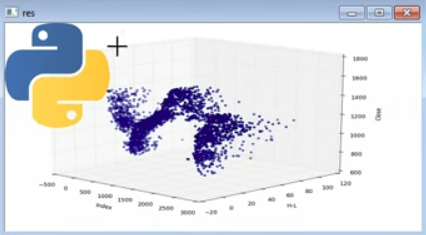

# Thresholding
https://docs.opencv.org/2.4/doc/tutorials/imgproc/threshold/threshold.html

We'll take a look a couple of thresholds here
- thresh_binary : which simply maximizes all values > threshold
- thresh_gaussin: which is a little more complex. 

In [11]:
"""
What we're going to do here is import an image of a book in really bad writing, use the threshold concept to change up the pixels
and make it clearer
"""

image = cv2.imread('C:/Users/Darshil/Desktop/Dreams/bookpage.jpg')   #original image
retval, threshold = cv2.threshold(image,12,255,cv2.THRESH_BINARY)   # Anything above 12 will be 255 (so white) else black 

grayscaled = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)            # Change up original to grayscaled image 
retval2, threshold2 = cv2.threshold(grayscaled,12,255,cv2.THRESH_BINARY)     #apply the threshold effect 
gaus = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)

cv2.imshow('original',image)
cv2.imshow('threshold',threshold)
cv2.imshow('threshold2',threshold2) #Note how threshold 2 looks different because it was applied on a grayscale image
cv2.imshow('gaus',gaus)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Color Filtering
- Lets dive into fiktering images/videos for a range of colors. Use cases involve identifying and extracting colors!
- example: green screens: we find the green and replace it with image/video


Note: HSV = Hue, saturation, values, where
- hue: color pick
- value = how dark or light that color is
- saturation - intensity of the color


<h3> What exactly are we doing here? </h3> <br> 
- Basically we take a video, read it and then convert it into HSV 
- then define a low and high "red" boundaries 
- Finally we mask everything in that range to identify the red

In [1]:
"""
This is a fun project!
"""
cap = cv2.VideoCapture(0)

while True: 
    _, frame = cap.read()     #read frames from video
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)      # convert BGR to HSV
    
    lower_red = np.array([150,150,30])
    upper_red = np.array([180,255,150])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)   # mask will be everything in the ranges which for now is everything because 0-255 pixels only 
    res = cv2.bitwise_and(frame,frame,mask=mask) # read: if something in the frame AND mask = true
    
    cv2.imshow('frame',frame)
    #cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    if cv2.waitKey(5)== ord('q'):
        
        break
        
cv2.destroyAllWindows()
cap.release()

NameError: name 'cv2' is not defined

# Blurring & Smoothing
Lets dive into blurring and smoothing. 
What we're doing here: 
- capturing video
- masking the video such as to only identify the red color layer
- applying different blur options to the masked image

- In effect, blurring is basically averaging out pixels in a way. Remember that as we learned in Andrew Ng's CNN course, I believe we simply pass in a nxn filter over the image such that to create an output image of the same channels and dimensions (so perhaps padding is added automatically..? Will explore)

In [2]:
"""
This is a fun project!
"""
cap = cv2.VideoCapture(0)

while True: 
    _, frame = cap.read()     #read frames from video
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)      # convert BGR to HSV
    
    lower_red = np.array([150,150,50])
    upper_red = np.array([180,255,150])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)   # mask will be everything in the ranges which for now is everything because 0-255 pixels only 
    res = cv2.bitwise_and(frame,frame,mask=mask) # read: if something in the frame AND mask = true
     
    kernel = np.ones((15,15), np.float32)/225         #Note we set up a nxn kernel here/ divide by the product and then apply
    smoothed = cv2.filter2D(res,-1,kernel)             #apply the kernel
     
        
"""Applying some in-built blurs"""            
    blur = cv2.GaussianBlur(res,(15,15),0)          #applying a gaussian blur kernel
    median = cv2.medianBlur(res,15)                 #Applying a median blur
    bilateral = cv2.bilateralFilter(res,15,75,75)   #Applying a bilateral blur
            
    cv2.imshow('frame',frame)
    #cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    #cv2.imshow('smoothed',smoothed)
    cv2.imshow('blur',blur)
    cv2.imshow('median',median)
    cv2.imshow('bilateral',bilateral)
        
    if cv2.waitKey(5)== ord('q'):        
        break
        
cv2.destroyAllWindows()
cap.release()

IndentationError: unexpected indent (<ipython-input-2-a9853c527985>, line 21)

# Morphological Transformations

What is really is (opencv definition!): MTs are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation
Good read on what these are: https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html


Some transormations are as follows-- 

**Erosion**: sliding window/ kernel of size nxnxnc looks for differing pixel values and removes any that dont match. _"So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero)."_

**Dilation**: _Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it._

Different variations of these transformations are as follows--

**Opening**:_Opening is just another name of erosion followed by dilation. It is useful in removing noise_

**Closing**: _Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object._

In [11]:
"""
This is one more  fun project!
"""
cap = cv2.VideoCapture(0)

while True: 
    _, frame = cap.read()     #read frames from video
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)      # convert BGR to HSV
    
    lower_red = np.array([150,150,50])
    upper_red = np.array([180,255,150])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)   # mask will be everything in the ranges which for now is everything because 0-255 pixels only 
    res = cv2.bitwise_and(frame,frame,mask=mask) # read: if something in the frame AND mask = true
     
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask, kernel, iterations =1)
    dilation = cv2.dilate(mask, kernel, iterations =1)
    
    opening  = cv2.morphologyEx(mask, cv2.MORPH_OPEN,kernel)
    closing  = cv2.morphologyEx(mask, cv2.MORPH_CLOSE,kernel)
    
#     cv2.imshow('frame',frame)
#     cv2.imshow('res',res)
#     cv2.imshow('erosion',erosion)
#     cv2.imshow('dilation',dilation)
    cv2.imshow('opening',opening)
    cv2.imshow('closing',closing)

        
    if cv2.waitKey(5)== ord('q'):        
        break
        
cv2.destroyAllWindows()
cap.release()

# Canny Edge Detection and Gradients
Good read: https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html

- What we'll do here is simply apply filters allowing us to perform edge detection operaitons using Soble and Laplacian operators. 
- After which we will employ the use of inbuilt edge detectors

In [3]:
"""
This is another fun project!
"""
cap = cv2.VideoCapture(0)

while True: 
    _, frame = cap.read()     #read frames from video

    laplacian = cv2.Laplacian(frame,cv2.CV_64F)       #black and white 
    sobelx= cv2.Sobel(frame, cv2.CV_64F, 1,0,ksize = 5)    #Soblex = vertical edge detectors, ksize = kernel size
    sobely =cv2.Sobel(frame, cv2.CV_64F, 0,1,ksize = 5)    # sobley = horizontal edge detector
    edges = cv2.Canny(frame,100,200)                        #calling inbuilt edge detectors- input image,, minval,maxval.
                                                            #...lower= more noise, higher = less noise
#     cv2.imshow('original',frame)
#     cv2.imshow('laplcaian',laplacian)
#     cv2.imshow('sobelx',sobelx)
#     cv2.imshow('sobely',sobely)
    cv2.imshow('edges',edges)
    
    if cv2.waitKey(5)== ord('q'):        
        break
        
cv2.destroyAllWindows()
cap.release()

# Template Matching

So basically template is a sub region of the image that we pass over the image to detect if it there or not. Usually this method works if you need around a 70-80% accuracy rate

In [151]:
img_bgr = cv2.imread('C:/Users/Darshil/Desktop/Dreams/opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)

template = cv2.imread('C:/Users/Darshil/Desktop/Dreams/opencv-template-for-matching.jpg',0)

w,h = template.shape[0:2]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.85
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr,pt,(pt[0]+w,pt[1]+h),(0,255,255),2)

cv2.imshow('detected', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

# GrabCut Foreground Extraction
Read: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html
<br> 

Grabcut algorithm allows us to remove the background and just have the image present. In filmaking, you can see this via the use of green screens!
<br>

Notes:
- more on np.where: https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html , returns indexes where criteris is satisfied


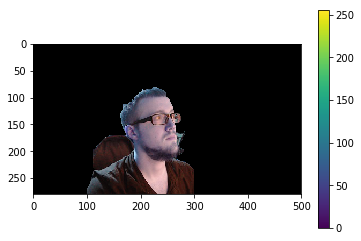

In [54]:
img  = cv2.imread('C:/Users/Darshil/Desktop/Dreams/opencv-python-foreground-extraction-tutorial.jpg')
mask = np.zeros(img.shape[:2], np.uint8)         #creting a mask filter

bgdModel = np.zeros((1,65), np.float64)   #These are arrays used by the algorithm internally. 
fgdModel = np.zeros((1,65), np.float64)    #...You just create two np.float64 type zero arrays of size (1,65).

rect = (100,50,200,500)          #defining the rectangle here, (x,y,w,h) - your rectangle should include the object!

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)   #cutting it out
mask2 = np.where((mask==2)|(mask == 0),0,1).astype('uint8')

img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

# Corner Detection
Corner detection is used in motion tracking, chacracter recognition etc! <br>

Read: https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#goodfeaturestotrack

In [5]:
img = cv2.imread('C:/Users/Darshil/Desktop/Dreams/opencv-corner-detection-sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)     #we convert to numpy array but the output is the same. Datatype conversions

corners = cv2.goodFeaturesToTrack(gray, 100,0.01,10)   #image, how many corners, image quality, minimum distance betwee corners
corners = np.int0(corners)

for corner in corners:       #get each corners x,y coordinates like this
    x,y = corner.ravel()    #remove extra brackets
    cv2.circle(img,(x,y),3,255,-1)     #image, coordinates, radius, color, fill in or not where each corner coordinate is at
    
cv2.imshow('corner',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Feature Matching
We're going to be using an advanced form of template matching where we match a template (different rotation, shodows etc) in the original image
<br>
Read: https://docs.opencv.org/3.3.0/dc/dc3/tutorial_py_matcher.html

In [149]:
img1 =  cv2.imread('C:/Users/Darshil/Desktop/Dreams/opencv-feature-matching-template.jpg') 
img2 = cv2.imread('C:/Users/Darshil/Desktop/Dreams/opencv-feature-matching-image.jpg') 

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)   # defining key points and descriptors 
kp2, des2 = orb.detectAndCompute(img2,None)     # defining key points and descriptors 

bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key= lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:12],None,flags=2)  #image, desc, image2,desc2,#of matches,none,flag
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# MOG Background Reduction 
We're going to continue building on the foreground extraction problem- we're going to be covering how to reduce the background of images, by detecting motion. Basically we reduced the background except for the moving object so as to detect it visually

<br>
Read: https://docs.opencv.org/3.3.0/db/d5c/tutorial_py_bg_subtraction.html

In [4]:
cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    
    cv2.imshow('original',frame)
    cv2.imshow('fg',fgmask)
    
    if cv2.waitKey(5)== ord('q'): 
        break

cap.release()
cv2.destroyAllWindows()

# Haar Cascade Object Detection Face
Lets dive into object detection using Haar cascades!

### How this works- 
- You use pretrained models I believe called "cascades" in this case. Lincensed by intel 
- Theres different models for different purposes: eye detection, license plates etc
- Link here: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades

#### What are we going to detect?
- Here we're going to detect faces, eyes and smiles
- remember that in order to detect eyes and smiles we need to look for the ROI within the face

In [5]:
face_cascade = cv2.CascadeClassifier('C:/Users/Darshil/Desktop/Dreams/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/Darshil/Desktop/Dreams/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('C:/Users/Darshil/Desktop/Dreams/haarcascade_smile.xml')


cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    faces = face_cascade.detectMultiScale(gray,1.3,5) 
    
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        cv2.putText(img,'Face spotted!', (x,y),font,0.7,(200,255,255),1,cv2.LINE_AA)  #IMAGE,text,position start,font,size,color,thickness,-
        
        smiles = smile_cascade.detectMultiScale(roi_gray,1.3,5) 
        for (x, y, w, h) in smiles:
            cv2.rectangle(roi_color, (x, y), (x+w, y+h), (0, 0, 255), 1)
        
        eyes = eye_cascade.detectMultiScale(roi_gray)        
        for (ex,ey,ew,eh) in eyes:            
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    
    cv2.imshow('img',img)
    
    
    if cv2.waitKey(5)== ord('q'):        
        break
        
cv2.destroyAllWindows()
cap.release()